In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.pandas.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv('AutoData (1).csv')
df.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.shape

(205, 25)

In [4]:
df.columns

Index(['symboling', 'make', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [5]:
categorical_cols = [col for col in df.columns if df[col].dtype=='O']
print(categorical_cols)

['make', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


In [6]:
for col in categorical_cols:
    print(col, "=", df[col].unique(),end="\n\n")

make = ['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'buick skyhawk' 'buick opel

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   make              205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [8]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
numerical_cols = [col for col in df.columns if df[col].dtype!='O']
print(numerical_cols)

['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


In [10]:
df.isnull().sum()

symboling           0
make                0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [11]:
df.duplicated().sum()

0

# EDA(Exploratory Data Analysis)

In [12]:
df.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

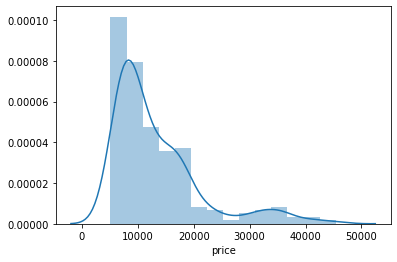

In [13]:
sns.distplot(df['price']);

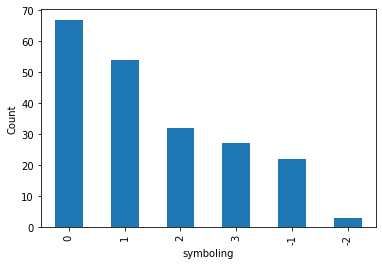

In [14]:
df['symboling'].value_counts().plot.bar()
plt.xlabel('symboling')
plt.ylabel('Count');

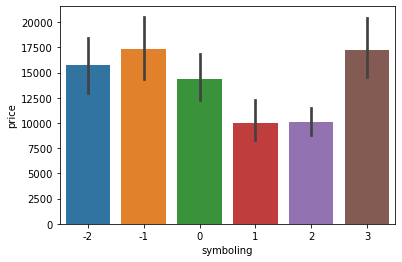

In [15]:
sns.barplot(x='symboling',y='price',data=df);

In [16]:
df['make'].str.split(" ").str.get(0)

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: make, Length: 205, dtype: object

In [17]:
df['make'] = df['make'].str.split(" ").str.get(0)
df['make'].head()

0    alfa-romero
1    alfa-romero
2    alfa-romero
3           audi
4           audi
Name: make, dtype: object

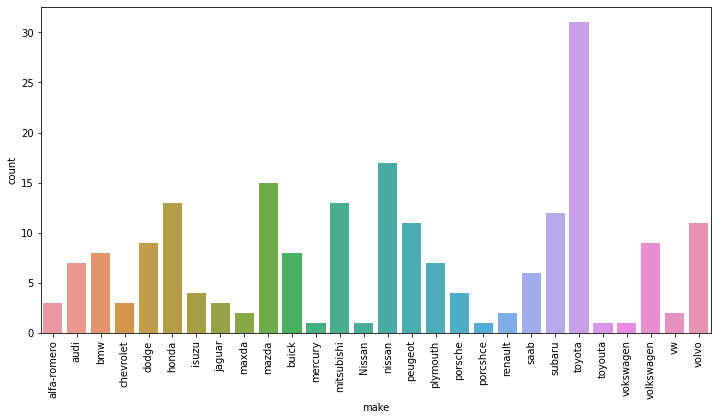

In [18]:
plt.figure(figsize=(12,6))
sns.countplot(df['make'])
plt.xticks(rotation = 90)
plt.tight_layout;


In [19]:
df['make'] = df['make'].replace(['vm', 'vokswagon'], 'volkswagon')
df['make'] = df['make'].replace(['maxda'], 'mazda')
df['make'] = df['make'].replace(['porcshce'], 'porsche')
df['make'] = df['make'].replace(['toyouta'], 'toyota')

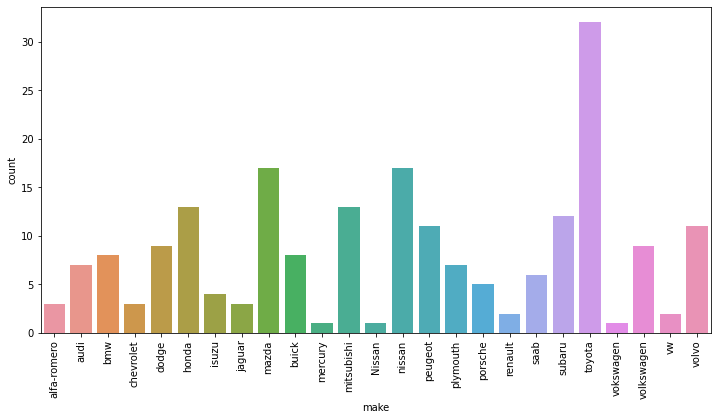

In [20]:
plt.figure(figsize=(12,6))
sns.countplot(df['make'])
plt.xticks(rotation = 90)
plt.tight_layout;

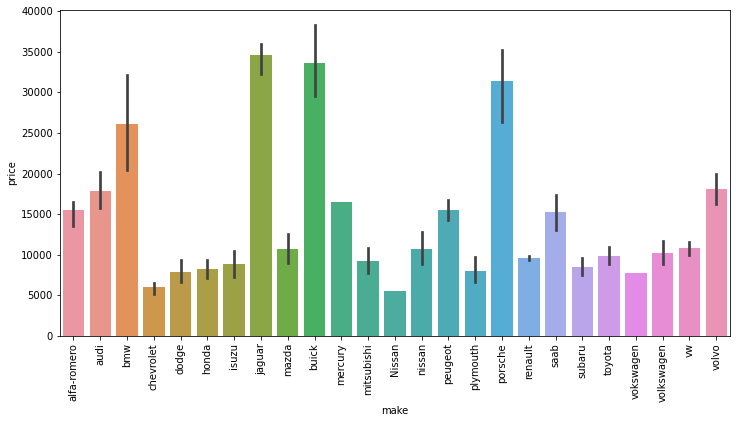

In [21]:
plt.figure(figsize=(12,6))
sns.barplot(x='make',y='price',data=df)
plt.xticks(rotation = 90)
plt.tight_layout;

In [22]:
categorical_cols

['make',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

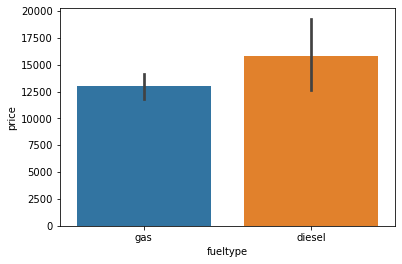

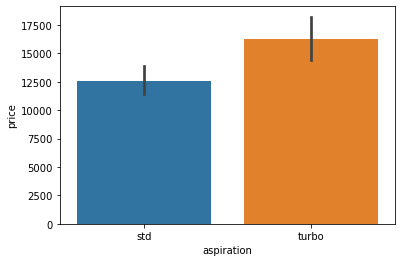

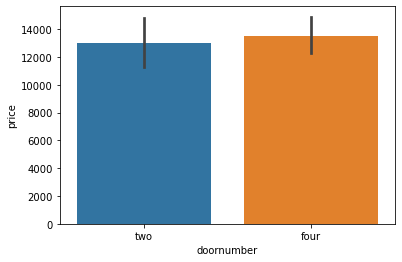

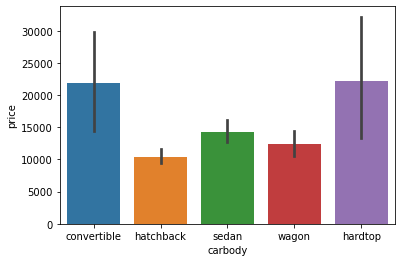

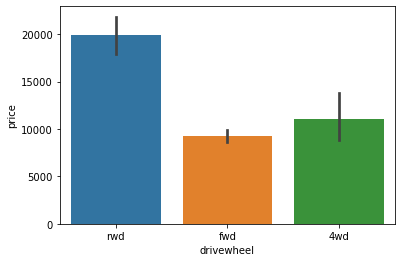

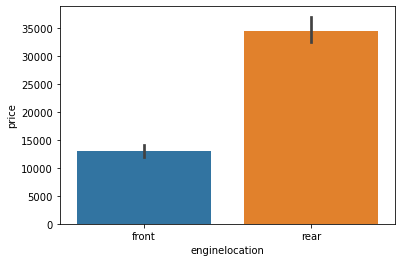

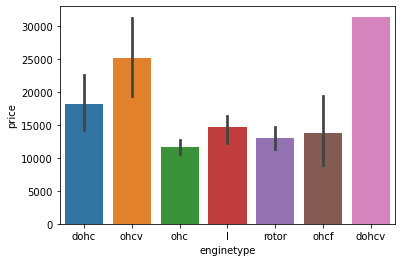

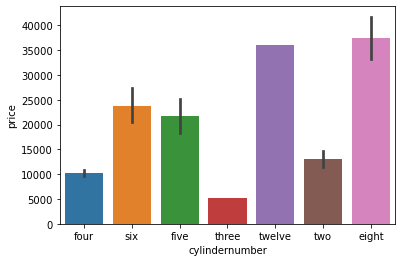

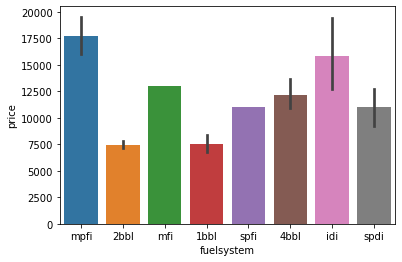

In [23]:
for col in categorical_cols[1:]:
    sns.barplot(x=col,y='price',data=df)
    plt.show()

In [24]:
numerical_cols

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

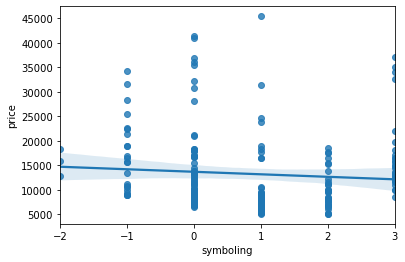

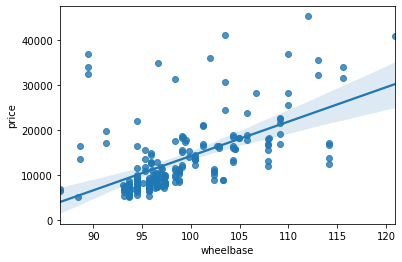

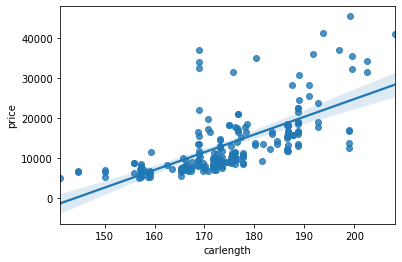

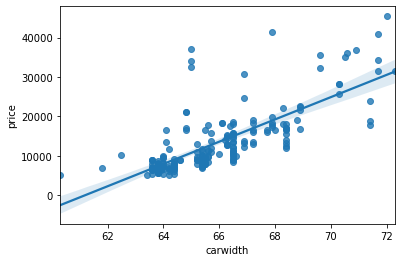

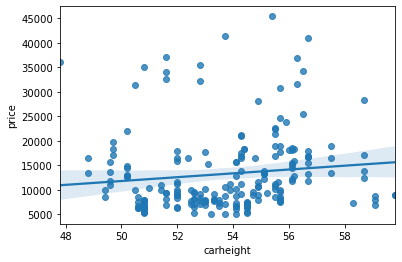

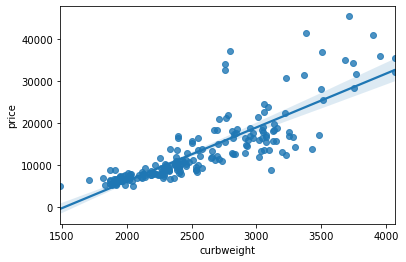

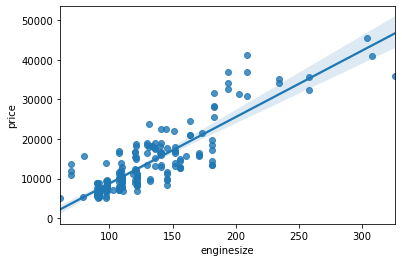

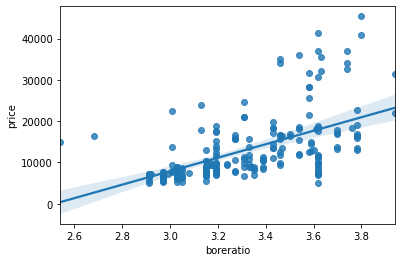

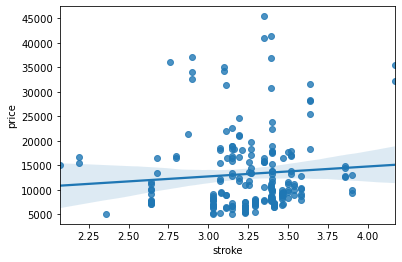

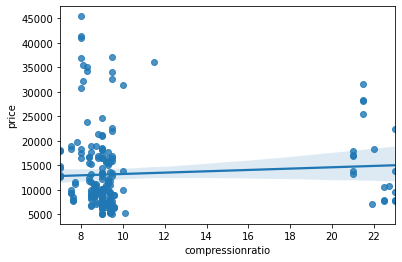

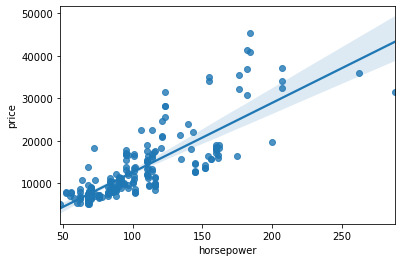

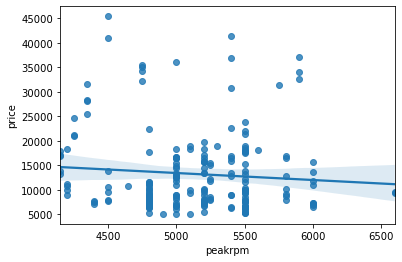

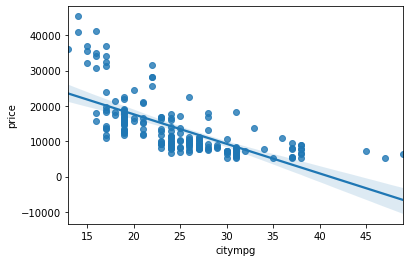

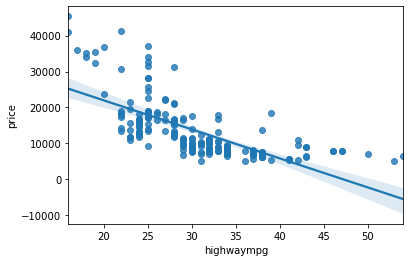

In [25]:
for col in numerical_cols[:14]:
    sns.regplot(x=col,y='price',data=df)
    plt.show()

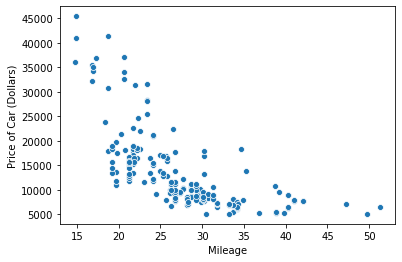

In [26]:
df['mileage'] = df['citympg']*0.55 + df['highwaympg']*0.45
plot = sns.scatterplot(x = 'mileage', y = 'price', data = df)
plot.set_xlabel('Mileage')
plot.set_ylabel('Price of Car (Dollars)')
plt.show();

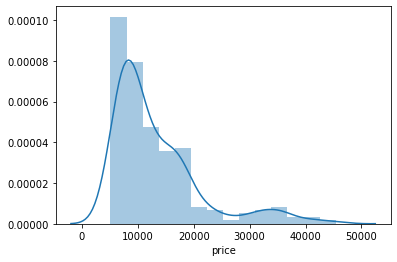

In [27]:
sns.distplot(df['price'])

In [28]:
df['brand_category'] = df['price'].apply(lambda x : "Budget" if x < 10000 
                                                     else ("Mid_Range" if 10000 <= x < 20000
                                                           else "Luxury"))

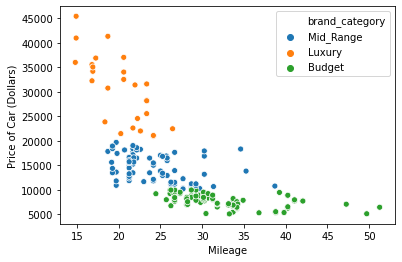

In [29]:
plt1 = sns.scatterplot(x = 'mileage', y = 'price', hue = 'brand_category', data = df)
plt1.set_xlabel('Mileage')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

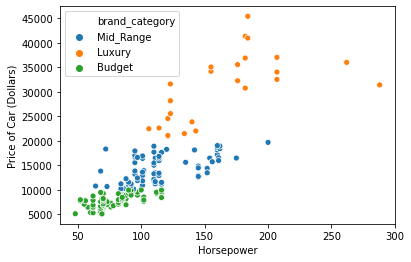

In [30]:
plt1 = sns.scatterplot(x = 'horsepower', y = 'price', hue = 'brand_category', data = df)
plt1.set_xlabel('Horsepower')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

#### The most important driver variable for prediction of price are:-

1. Brand Category
2. Fuel Type
3. Aspiration
4. Car Body
5. Drive Wheel
6. Wheelbase
7. Car Length
8. Car Width
9. Curb weight
10. Engine Type
11. Cylinder Number
12. Engine Size
13. Bore Ratio
14. Horsepower
15. Mileage

In [31]:
df1 = df[['fueltype', 'aspiration', 'carbody', 'drivewheel', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize',  'boreratio', 'horsepower', 'price', 'brand_category', 'mileage']]
df1.head()

,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,price,brand_category,mileage
0,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,13495.0,Mid_Range,23.70
1,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,16500.0,Mid_Range,23.70
2,gas,std,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,six,152,2.68,154,16500.0,Mid_Range,22.15
3,gas,std,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,109,3.19,102,13950.0,Mid_Range,26.70
4,gas,std,sedan,4wd,99.4,176.6,66.4,2824,ohc,five,136,3.19,115,17450.0,Mid_Range,19.80


In [32]:
df1 = pd.get_dummies(df1,drop_first=True)
df1.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,mileage,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,brand_category_Luxury,brand_category_Mid_Range
0,88.6,168.8,64.1,2548,130,3.47,111,13495.0,23.70,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,88.6,168.8,64.1,2548,130,3.47,111,16500.0,23.70,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,94.5,171.2,65.5,2823,152,2.68,154,16500.0,22.15,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1
3,99.8,176.6,66.2,2337,109,3.19,102,13950.0,26.70,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
4,99.4,176.6,66.4,2824,136,3.19,115,17450.0,19.80,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1


In [33]:
num_cols = ['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','price']

In [34]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
df1[num_cols] = scaler.fit_transform(df1[num_cols])
df1.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,mileage,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,brand_category_Luxury,brand_category_Mid_Range
0,-1.063291,-0.261905,-0.500000,0.169620,0.227273,0.372093,0.347826,0.367183,23.70,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,-1.063291,-0.261905,-0.500000,0.169620,0.227273,0.372093,0.347826,0.711991,23.70,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,-0.316456,-0.119048,0.000000,0.517722,0.727273,-1.465116,1.282609,0.711991,22.15,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1
3,0.354430,0.202381,0.250000,-0.097468,-0.250000,-0.279070,0.152174,0.419392,26.70,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
4,0.303797,0.202381,0.321429,0.518987,0.363636,-0.279070,0.434783,0.820998,19.80,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1


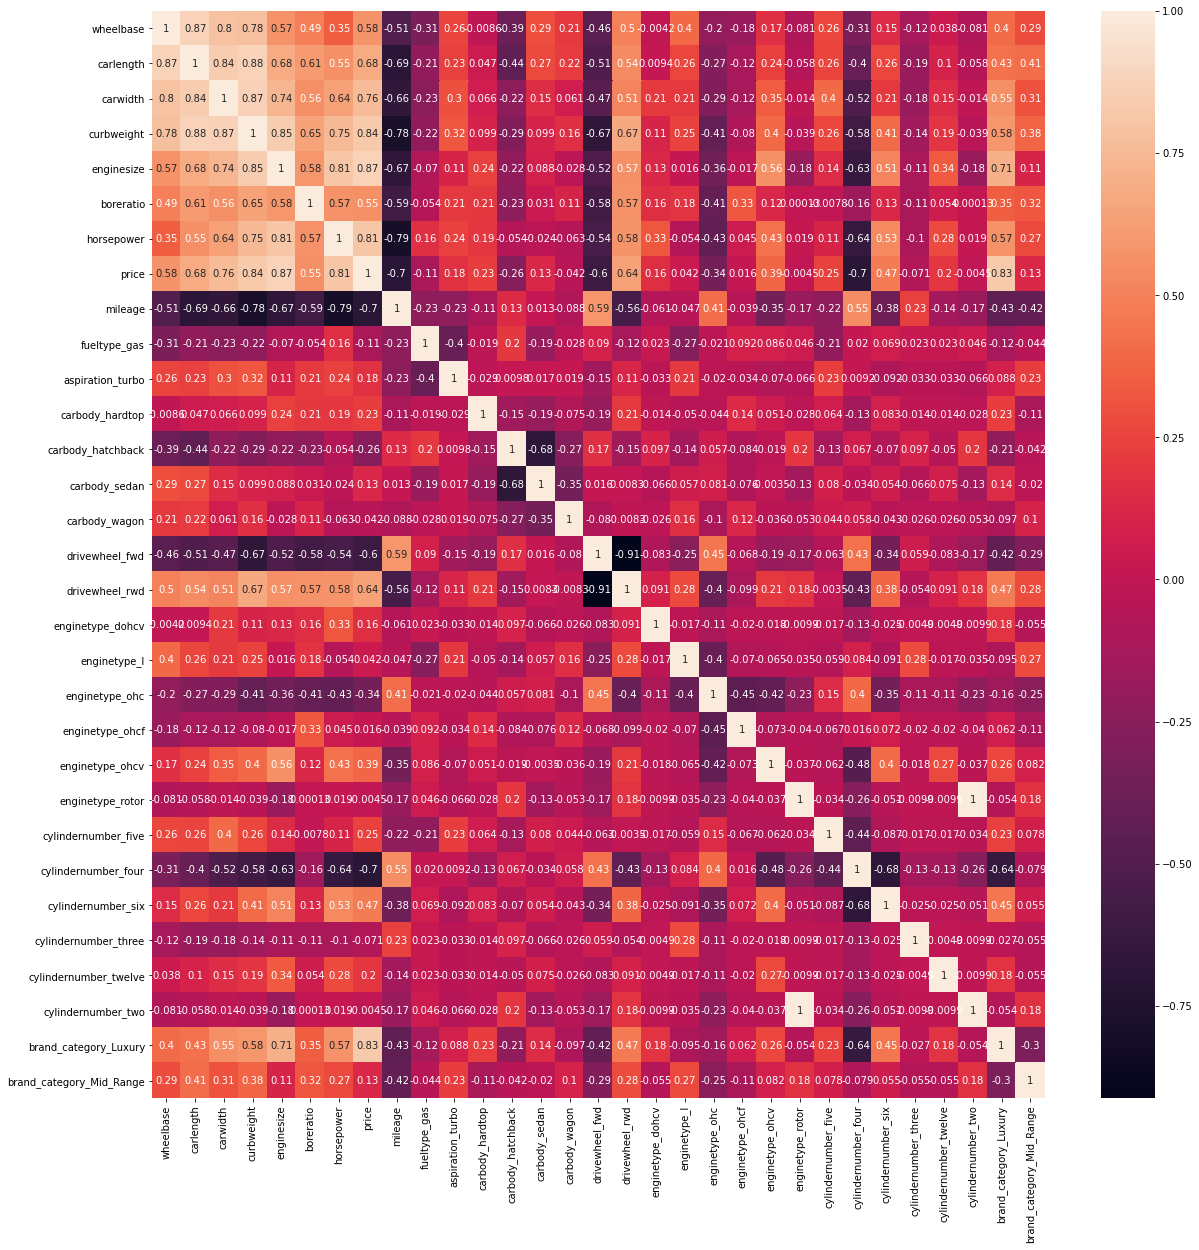

In [35]:
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(),annot=True);

Price and Engine Size is 87% correlated.

## Simple Linear Regression

In [36]:
X = np.array(df1['enginesize'])
y = np.array(df1['price'])

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [39]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train.reshape(-1,1),y_train)

LinearRegression()

In [40]:
y_pred = lr.predict(X_test.reshape(-1,1))

In [41]:
lr.coef_

array([0.82959035])

In [42]:
lr.intercept_

0.20762860209873862

In [43]:
# Evaluating the Algorithm
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, 
                                                                     y_pred))) 
print('R_squared Error:', metrics.r2_score(y_test, y_pred)) 

Mean Absolute Error: 0.3666128788869814
Mean Squared Error: 0.22166257408142764
Root Mean Squared Error: 0.47081055009571277
R_squared Error: 0.7825324721447275


## Multiple Linear Regression

In [44]:
X = df1.drop('price',axis=1)
y = df1['price']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [46]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [47]:
y_pred = lr.predict(X_test)

In [48]:
lr.coef_

array([ 8.25750464e-02, -3.92108304e-02,  2.69575270e-02,  1.42687483e-01,
        8.05362553e-02, -1.12796309e-01,  5.87082909e-01,  1.02037856e-02,
       -2.60917539e-01, -2.59389038e-01, -3.99993452e-01, -3.61392889e-01,
       -2.90568155e-01, -3.39038888e-01, -1.14823011e-01, -1.66840426e-02,
       -8.88178420e-16,  1.88534197e-01,  1.34712919e-01,  2.29765454e-01,
       -1.84829764e-01, -1.33279789e-01, -5.17773865e-01, -5.26717040e-01,
       -7.61232829e-01, -1.11022302e-16, -1.28970424e+00, -1.33279789e-01,
        1.33695307e+00,  2.52010356e-01])

In [49]:
lr.intercept_

0.720544449261967

In [50]:
# Evaluating the Algorithm
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, 
                                                                     y_pred))) 
print('R_squared Error:', metrics.r2_score(y_test, y_pred)) 

Mean Absolute Error: 0.27595320076091495
Mean Squared Error: 0.19158092892284387
Root Mean Squared Error: 0.4376995875287568
R_squared Error: 0.8120448110389498


### Multiple Linear Regression performs well as it has high R-Squared Value than Simple Linear Regression